In [72]:
import os
import kaggle # Upewnij się, że plik kaggle.json znajduje się w katalogu .kaggle w Twoim katalogu domowym

dataset_path = 'Datasets/gender-classification-dataset'
if not os.path.exists(dataset_path):
    kaggle.api.dataset_download_files('cashutosh/gender-classification-dataset', path=dataset_path, unzip=True)
else:
    print("Zbior danych został już pobrany")

Zbior danych został już pobrany


In [73]:
#Dataset path:
PATH = 'Datasets/gender-classification-dataset'

In [74]:
def remove_double_jpg(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg.jpg"):
                old_path = os.path.join(root, file)
                new_path = old_path.rsplit('.', 1)[0]
                os.rename(old_path, new_path)
remove_double_jpg(PATH)

In [75]:
def rename_images(directory):
    for root, dirs, files in os.walk(directory):
        counter = 1
        for file in sorted(files):
            if file.endswith(".jpg"):
                old_path = os.path.join(root, file)
                new_path = os.path.join(root, f"{counter}.jpg")
                os.rename(old_path, new_path)
                counter += 1
rename_images(PATH)

In [76]:
from PIL import Image
import os

def check_shape(directory):
    min_width = float('inf')
    min_height = float('inf')
    max_width = float('-inf')
    max_height = float('-inf')
    min_width_image = None
    min_height_image = None
    max_width_image = None
    max_height_image = None

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg"):
                path = os.path.join(root, file)
                image = Image.open(path)
                width, height = image.size

                if width < min_width:
                    min_width = width
                    min_width_image = path

                if height < min_height:
                    min_height = height
                    min_height_image = path

                if width > max_width:
                    max_width = width
                    max_width_image = path

                if height > max_height:
                    max_height = height
                    max_height_image = path

    image_1 = Image.open(min_width_image)
    image_2 = Image.open(min_height_image)
    image_11 = Image.open(max_width_image)
    image_22 = Image.open(max_height_image)

    print("Image with the smallest width:", min_width_image.split('/')[-1], image_1.size)
    print("Image with the smallest height:", min_height_image.split('/')[-1], image_2.size)
    print("Image with the biggest width:", max_width_image.split('/')[-1], image_11.size)
    print("Image with the biggest height:", max_height_image.split('/')[-1], image_22.size)

check_shape(PATH)

Image with the smallest width: 20049.jpg (52, 62)
Image with the smallest height: 22773.jpg (52, 58)
Image with the biggest width: 20779.jpg (111, 131)
Image with the biggest height: 3137.jpg (105, 151)


In [77]:
def resize_image(directory, x=52, y=52):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg"):
                path = os.path.join(root, file)
                image = Image.open(path)
                resized_image = image.resize((x, y))
                resized_image = resized_image.convert("RGB")
                resized_image.save(path)
resize_image(PATH)

In [78]:
def is_rgb_image(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg"):
                path = os.path.join(root, file)
                image = Image.open(path)
                if image.mode != 'RGB':
                    print(f'Image {path} is not in RGB format')
    print('All images are in RGB format')
is_rgb_image(PATH)

All images are in RGB format


In [79]:
categories = ['Training', 'Validation']
genders = ['male', 'female']

images = []
labels = []
purposes = []

image_files = {
    category: {
        gender: [
            os.path.join(PATH, category, gender, file)
            for file in os.listdir(os.path.join(PATH, category, gender))
            if file.endswith(".jpg")
        ]
        for gender in genders
    }
    for category in categories
}

In [80]:
import cv2

def load_image_with_extension(path):
        image = cv2.imread(path)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            return image
        return None

In [81]:
def select_faces(image_files):
    images = []
    labels = []
    purposes = []
    for purpose, gender_dict in image_files.items():
        for gender, files in gender_dict.items():
            for file in files:
                image = load_image_with_extension(file)
                if image is not None:
                    images.append(image)
                    labels.append(gender)
                    purposes.append(purpose)
    return images, labels, purposes

images, labels, purposes = select_faces(image_files)

In [82]:
import pandas as pd

df = pd.DataFrame({"Image":images, "Gender":labels, "Purpose":purposes})
print(df)

                                                   Image  Gender     Purpose
0      [[[29, 22, 16], [32, 25, 19], [40, 33, 27], [4...    male    Training
1      [[[52, 35, 28], [30, 13, 5], [60, 40, 31], [85...    male    Training
2      [[[25, 2, 0], [93, 67, 52], [142, 113, 99], [1...    male    Training
3      [[[188, 167, 166], [189, 168, 167], [191, 170,...    male    Training
4      [[[190, 108, 84], [198, 116, 92], [201, 120, 9...    male    Training
...                                                  ...     ...         ...
58653  [[[66, 48, 46], [58, 40, 38], [48, 32, 32], [4...  female  Validation
58654  [[[90, 70, 63], [67, 47, 40], [73, 50, 42], [9...  female  Validation
58655  [[[62, 45, 17], [57, 40, 12], [61, 40, 13], [6...  female  Validation
58656  [[[60, 47, 39], [56, 43, 35], [52, 42, 33], [5...  female  Validation
58657  [[[45, 25, 27], [40, 20, 22], [46, 26, 28], [6...  female  Validation

[58658 rows x 3 columns]


Example image // sex: male


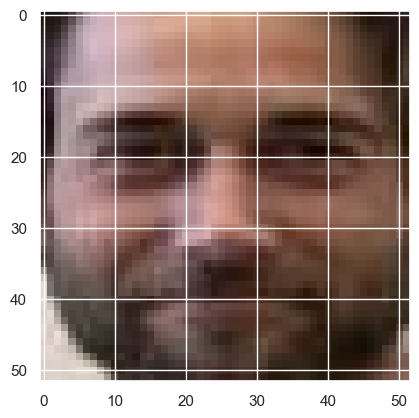

Shape:  (52, 52, 3)


In [83]:
import matplotlib.pyplot as plt

def check_loading_correctness(df):
    rand = df.sample(1)

    print(f"Example image // sex: {rand['Gender'].values[0]}")
    image = rand['Image'].values[0]
    plt.imshow(image)
    plt.show()
    print("Shape: ", image.shape)
check_loading_correctness(df)

In [84]:
from tabulate import tabulate

size = len(df)
print("Total samples:", size)

men = df[df["Gender"] == "male"]
women = df[df["Gender"] == "female"]

data = [['Male', len(men)], ['Female', len(women)]]
table = tabulate(data, headers=['Gender', 'Count'], tablefmt='pretty')

print(table)

Total samples: 58658
+--------+-------+
| Gender | Count |
+--------+-------+
|  Male  | 29574 |
| Female | 29084 |
+--------+-------+


In [85]:
# Oversampling
from sklearn.utils import resample

df_male = df[df['Gender'] == 'male']
df_female = df[df['Gender'] == 'female']

# Oversampling
df_female_oversampled = resample(df_female,
                                  replace=True,
                                  n_samples=len(df_male),
                                  random_state=123)

df_oversampled = pd.concat([df_male, df_female_oversampled])

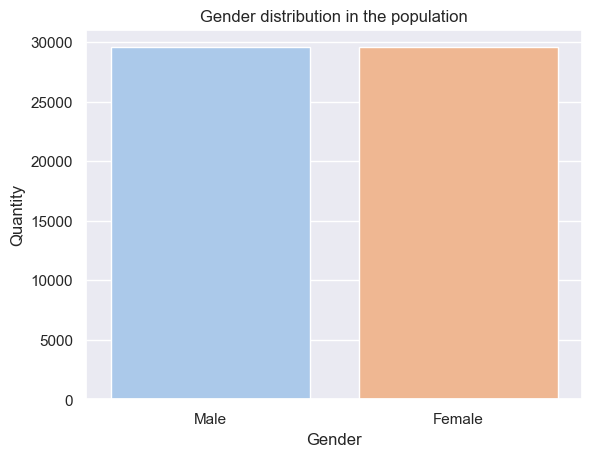

In [86]:
import seaborn as sns

sns.set_theme()
palette = sns.color_palette("pastel", n_colors=len(df_oversampled['Gender'].unique()))
sns.countplot(data=df_oversampled, x='Gender', hue='Gender', palette=palette, legend=False)
plt.xlabel('Gender')
plt.ylabel('Quantity')
plt.title("Gender distribution in the population")
plt.gca().set_xticks([0, 1])
plt.gca().set_xticklabels(['Male', 'Female'])
plt.savefig("Data/gender_distribution.png")
plt.show()

In [87]:
# After oversampling:
gender_counts = df_oversampled['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
table = tabulate(gender_counts, headers='keys', tablefmt='pretty')
print(table)

+---+--------+-------+
|   | Gender | Count |
+---+--------+-------+
| 0 |  male  | 29574 |
| 1 | female | 29574 |
+---+--------+-------+


In [88]:
# Kodowanie zmiennej jakościowej dla celów szkoleniowych:
df['Gender'] = df['Gender'].replace({'female': 1, 'male': 0})

In [89]:
# Model sieci:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self,dropout_prob=0.5):
        super(Net, self).__init__()

        kernel_s = 3

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=kernel_s, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(25*25*32, 256)

        self.fc2 = nn.Linear(256, 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        x = x.reshape(-1, 25*25*32)

        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc2(x))
        return x

In [90]:
Gender_model = Net()

In [91]:
# Funkcja straty:
criterion = nn.BCELoss()

In [92]:
# Optymalizator:
import torch.optim as optim
optimizer = optim.AdamW(Gender_model.parameters(), lr=0.001) # learning rate

In [93]:
# Podział danych na zbior walidacyjny oraz treningowy:
import torch

train_df = df[df['Purpose'] == 'Training']
test_df = df[df['Purpose'] == 'Validation']

# Normalizacja danych
x_train = torch.tensor(train_df['Image'].values.tolist(), dtype=torch.float32).reshape(-1,3,52,52) / 255.0
y_train = torch.tensor(train_df['Gender'].values.tolist(), dtype=torch.float32).reshape(-1, 1)
x_test = torch.tensor(test_df['Image'].values.tolist(), dtype=torch.float32).reshape(-1,3,52,52) / 255.0
y_test = torch.tensor(test_df['Gender'].values.tolist(), dtype=torch.float32).reshape(-1, 1)

In [94]:
# Utworzenie Datasets i Loaders z zadaną wielkością paczki - batch_size
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

batch_size = 64
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [97]:
import torch
from sklearn.metrics import accuracy_score

losses = []
accuracies = []

def train(num_epochs=15,patience=3):

    best_model_weights = None
    no_improvement_count = 0
    best_accuracy = 0.0
    best_accuracy_loss = 0.0

    for epoch in range(num_epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = Gender_model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            Gender_model.eval()
            gender_predictions = []
            true_labels = []
            test_losses = []

            for inputs, labels in testloader:
                outputs = Gender_model(inputs)
                test_loss = criterion(outputs, labels)
                test_losses.append(test_loss.item())
                gender_predictions.extend((outputs > 0.5).int().numpy())
                true_labels.extend(labels.numpy())

            accuracy = accuracy_score(true_labels, gender_predictions)
            avg_test_loss = sum(test_losses) / len(test_losses)
            losses.append(avg_test_loss)
            accuracies.append(accuracy)

            print(f"Epoch {epoch + 1}: Loss {round(avg_test_loss,3)}, Accuracy {round(accuracy,3)}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_accuracy_loss = avg_test_loss
            best_model_weights = Gender_model.state_dict()
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= patience:
            print(f"Stop learning, no improvement for {patience} epochs.")
            break

    if best_model_weights is not None:
        Gender_model.load_state_dict(best_model_weights)

    return best_accuracy, best_accuracy_loss

In [98]:
best_accuracy, best_accuracy_loss  = train()

Epoch 1: Loss 0.225, Accuracy 0.91
Epoch 2: Loss 0.179, Accuracy 0.93
Epoch 3: Loss 0.187, Accuracy 0.925
Epoch 4: Loss 0.171, Accuracy 0.934
Epoch 5: Loss 0.153, Accuracy 0.943
Epoch 6: Loss 0.15, Accuracy 0.943
Epoch 7: Loss 0.183, Accuracy 0.934
Epoch 8: Loss 0.178, Accuracy 0.935
Stop learning, no improvement for 3 epochs.


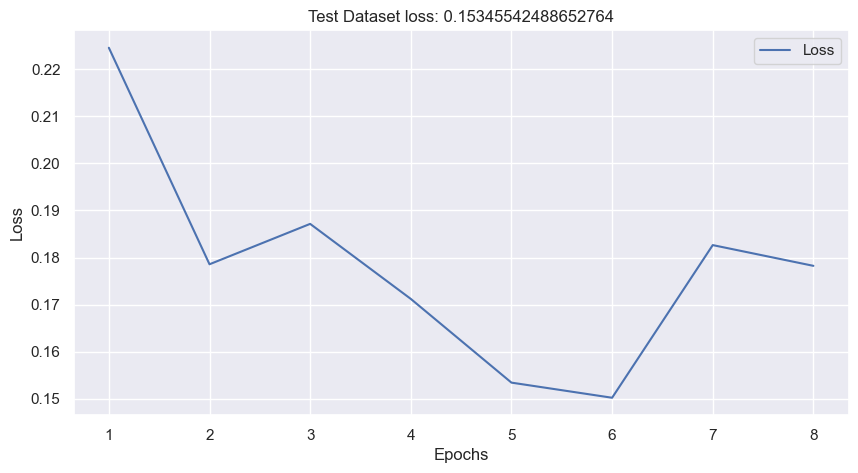

In [99]:
# Loss Chart:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(losses) + 1), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f"Test Dataset loss: {best_accuracy_loss}")
plt.savefig("Data/Loss.png")
plt.show()

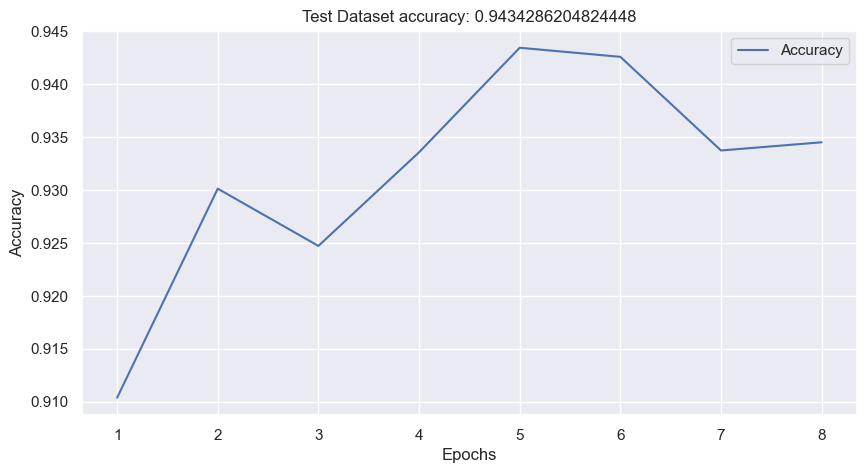

In [100]:
# Accuracy Chart:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracies) + 1), accuracies, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f"Test Dataset accuracy: {best_accuracy}")
plt.savefig("Data/Accuracy.png")
plt.show()

In [101]:
torch.save({'weights': Gender_model.state_dict()},"Models/gender_model.pth")

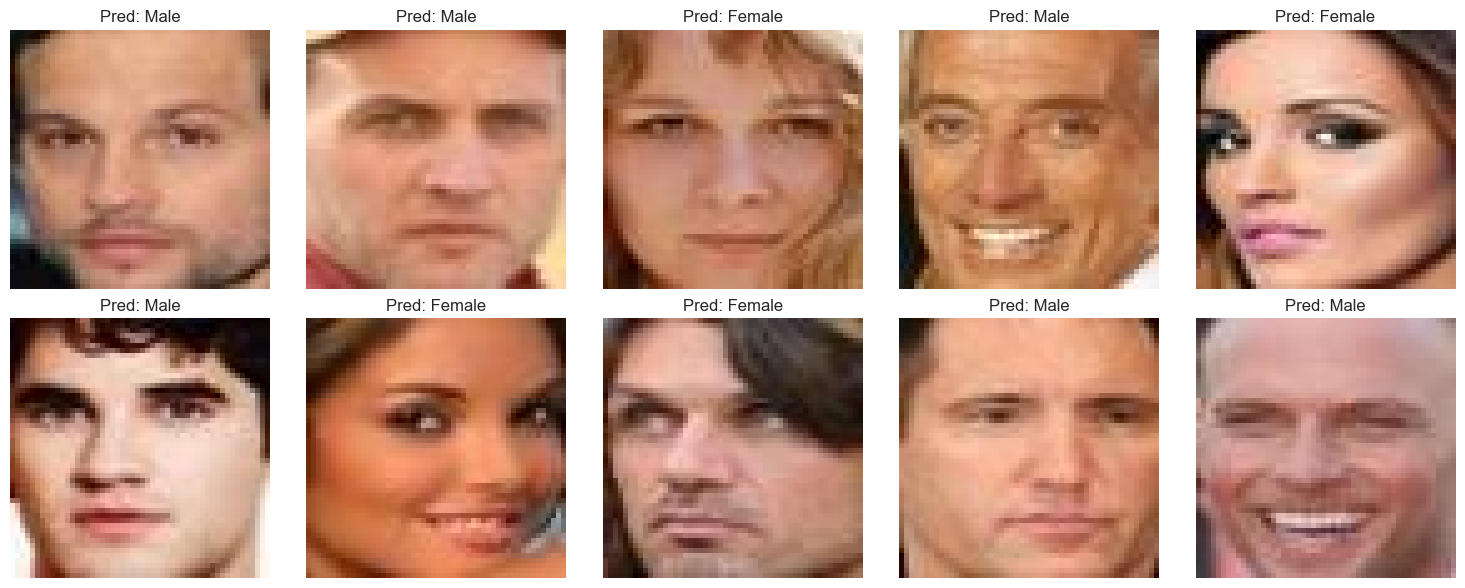

In [119]:
import random
import matplotlib.pyplot as plt
import torch

model = Gender_model
model.eval()

random_samples = random.sample(list(df["Image"]), 10)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, image in enumerate(random_samples):
    image_tensor = torch.from_numpy(image)
    image_tensor = image_tensor.view(3, 52, 52) / 255.0

    output = model(image_tensor.unsqueeze(0))
    predicted_gender = 'Male' if output.item() < 0.5 else 'Female'

    ax = axs[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title(f'Pred: {predicted_gender}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [103]:
os.system('say "Model training completed"')

0